In [5]:
import os
import shutil

from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import numpy as np
from sklearn.utils import shuffle
np.random.seed(1)
from keras import backend as K

import h5py
import sys

from PIL import Image
sys.modules['Image'] = Image

Using TensorFlow backend.


In [37]:
# preprocessing, move files to current project folder use soft link to faster and reduce space usage

keras_download_train = '/home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'
keras_download_test = '/home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/test'
train_filenames_list = os.listdir(keras_download_train)

train_cat = list(filter(lambda x:x[:3] == 'cat', train_filenames_list))
train_dog = list(filter(lambda x:x[:3] == 'dog', train_filenames_list))


def check_make_dir(*dirs):
    print("example input ('folder1','folder2')")
    for count,dirname in enumerate(dirs):
        if os.path.exists(dirname) and os.path.isdir(dirname):
            shutil.rmtree(dirname)
        os.mkdir(dirname)
        
check_make_dir('train2','train2/cat','train2/dog','test2')

check_make_dir('train','train/cat','train/dog','test','validation','validation/cat','validation/dog')
        
check_make_dir('train3','train3/cat','train3/dog')
    
os.symlink(keras_download_test, 'test2/test')

for filename in train_cat:
    os.symlink(keras_download_train+'/'+filename, 'train2/cat/'+filename)

for filename in train_dog:
    os.symlink(keras_download_train+'/'+filename, 'train2/dog/'+filename)
    
    
os.symlink(keras_download_test, 'train3/test')

for filename in train_cat:
    os.symlink(keras_download_train+'/'+filename, 'train3/cat/'+filename)

for filename in train_dog:
    os.symlink(keras_download_train+'/'+filename, 'train3/dog/'+filename)
    
    

os.symlink(keras_download_test, 'test/test')

for filename in train_cat[:10000]:
    os.symlink(keras_download_train+'/'+filename, 'train/cat/'+filename)

for filename in train_dog[:10000]:
    os.symlink(keras_download_train+'/'+filename, 'train/dog/'+filename)
    
for filename in train_cat[10000:]:
    os.symlink(keras_download_train+'/'+filename, 'validation/cat/'+filename)

for filename in train_dog[10000:]:
    os.symlink(keras_download_train+'/'+filename, 'validation/dog/'+filename)
    

example input ('folder1','folder2')
example input ('folder1','folder2')
example input ('folder1','folder2')


In [27]:
check_make_dir('train3')

NameError: name 'check_make_dir' is not defined

In [6]:
def get_input_shape(img_width, img_height):
    if K.image_data_format() == 'channels_first':
        input_shape = (3,img_width,img_height)
    else:
        input_shape = (img_width,img_height,3)
    return input_shape


In [2]:
# prepare image tensor

image_gen = ImageDataGenerator(featurewise_center=True,fill_mode='constant', 
                               cval=0, horizontal_flip=True, rotation_range=20, shear_range=0.2)

train_gen = image_gen.flow_from_directory("train2", (299, 299), shuffle=False, 
                                    batch_size=32, class_mode=None)

test_gen = image_gen.flow_from_directory("test2", (299, 299), shuffle=False, 
                                         batch_size=32, class_mode=None)

train_filenames = train_gen.filenames
train_nb_samples = len(train_filenames)

test_filenames = test_gen.filenames
test_nb_samples = len(test_filenames)


# define professor X
x = Input((299, 299, 3))
x = InceptionResNetV2(input_tensor=x, weights='imagenet', include_top=False, pooling = 'avg')


train = x.predict_generator(train_gen, steps=train_nb_samples, 
                                            verbose=1)

test = x.predict_generator(test_gen, steps=test_nb_samples, 
                                           verbose=1)
    

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


12500/12500 [==============================] - 10371s 830ms/step


In [5]:
with h5py.File("gap_{0}.h5".format('InceptionResNetV2')) as h:
    h.create_dataset("train", data=train)
    h.create_dataset("test", data=test)
    h.create_dataset("label", data=train_gen.classes)
        

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


OSError: Can't prepare for writing data (file write failed: time = Thu Aug  2 10:03:41 2018
, filename = 'gap_InceptionResNetV2.h5', file descriptor = 63, errno = 28, error message = 'No space left on device', buf = 0x7ff4c6973fb0, total write size = 1868353632, bytes this sub-write = 1868353632, bytes actually written = 18446744073709551615, offset = 10408222720)

In [28]:
ls -ltrh

total 9.7G
-rw-rw-r-- 1 ubuntu ubuntu  19K Aug  1 23:58 Untitled.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    6 Aug  1 23:58 README.md
-rw-rw-r-- 1 ubuntu ubuntu  91K Aug  1 23:58 model.h5_save
drwxrwxr-x 2 ubuntu ubuntu 4.0K Aug  1 23:58 uda/
-rw-rw-r-- 1 ubuntu ubuntu 112K Aug  1 23:58 sample_submission.csv
-rw-rw-r-- 1 ubuntu ubuntu 307K Aug  1 23:58 pred.csv
drwxrwxr-x 4 ubuntu ubuntu 4.0K Aug  2 00:00 train2/
drwxrwxr-x 2 ubuntu ubuntu 4.0K Aug  2 00:00 test2/
-rw-rw-r-- 1 ubuntu ubuntu  14K Aug  2 09:52 graduation_project.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 9.7G Aug  2 10:03 gap_InceptionResNetV2.h5


In [32]:
rm -rf /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/*.zip

In [29]:
ls -ltrh /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/*.zip

-rw-rw-r-- 1 ubuntu ubuntu 272M Aug  1 23:47 /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/test.zip
-rw-rw-r-- 1 ubuntu ubuntu 544M Aug  1 23:47 /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip


In [31]:
ls -ltrh /home/ubuntu/

total 1.1G
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_Xception.h5
-rw-rw-r--  1 ubuntu ubuntu  74M May 25  2017 gap_VGG19.h5
-rw-rw-r--  1 ubuntu ubuntu  74M May 25  2017 gap_VGG16.h5
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_ResNet50.h5
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_InceptionV3.h5
-rw-rw-r--  1 ubuntu ubuntu 2.8M Jul 18 02:00 Nvidia_Cloud_EULA.pdf
drwxrwxr-x  5 ubuntu ubuntu 4.0K Jul 19 18:10 tutorials/
drwxrwxr-x  8 ubuntu ubuntu 4.0K Jul 19 18:10 examples/
-rw-rw-r--  1 ubuntu ubuntu 2.8K Jul 19 18:11 README
drwxrwxr-x 24 ubuntu ubuntu 4.0K Jul 19 19:15 anaconda3/
drwxrwxr-x 10 ubuntu ubuntu 4.0K Jul 19 19:59 src/
-rw-rw-r--  1 ubuntu ubuntu 112K Aug  1 23:46 sample_submission.csv
drwxrwxr-x  7 ubuntu ubuntu 4.0K Aug  2 10:07 uda/


In [ ]:

def write_gap(MODEL, image_size, lambda_func=None):
    width = image_size[0]
    height = image_size[1]
    x = Input((height, width, 3))
    if lambda_func:
        x = Lambda(lambda_func)(x)

    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))

    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("train2", image_size, shuffle=False, 
                                              batch_size=16)
    test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                             batch_size=16, class_mode=None)
    print("stage2")

    #my add starts
    train_filenames = train_generator.filenames
    train_nb_samples = len(train_filenames)

    test_filenames = test_generator.filenames
    test_nb_samples = len(test_filenames)
    
    #my add finish
    
    print("{}".format(MODEL.__name__))
    print("stage3")
    
    train = model.predict_generator(train_generator,steps=train_nb_samples,verbose=1)
    test = model.predict_generator(test_generator,steps=test_nb_samples,verbose=1)
    
    print("stage4")

                                   
    with h5py.File("gap_%s.h5"%MODEL.__name__) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)
        
write_gap(ResNet50, (224, 224), resnet50.preprocess_input)
        
'''
write_gap(InceptionResNetV2, (299, 299), inception_resnet_v2.preprocess_input)


write_gap(ResNet50, (224, 224), resnet50.preprocess_input)
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)
write_gap(Xception, (299, 299), xception.preprocess_input)
'''


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
stage2
ResNet50
stage3
  290/25000 [..............................] - ETA: 1:00:45

In [6]:
print("test")

test


In [3]:
K.tensorflow_backend._get_available_gpus()

[]

In [11]:
import tensorflow as tf
import keras
config = tf.ConfigProto( device_count = {'GPU':1,'CPU':4})
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [13]:
K.tensorflow_backend._get_available_gpus()


[]

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4115043072748787727
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11284542260
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16765282053076248631
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


In [4]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("{}".format(tf.test.gpu_device_name()))
else:
    print("plz install gpu version")

/device:GPU:0


NameError: name 'input_model' is not defined

In [7]:
from keras.applications.inception_resnet_v2 import preprocess_input

img_width, img_height = 299,299

epochs = 10
batch_size = 16

base_model = Sequential()
base_model.add(Conv2D(32,(3,3), input_shape=get_input_shape(img_width,img_height)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Conv2D(32,(3,3)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Conv2D(64,(3,3)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Flatten())
base_model.add(Dense(64))
base_model.add(Activation('relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(1))
base_model.add(Activation('sigmoid'))

base_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

#seems rescale is very important.
#image_gen = ImageDataGenerator(featurewise_center=False,fill_mode='nearest',
#                               cval=0,horizontal_flip=True,rotation_range=20,shear_range=0.2,rescale=1./255)



image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'

train_gen = image_gen.flow_from_directory("train", (img_width,img_height), shuffle=True,
                                    batch_size=16,class_mode='binary')# subset = "training",class_mode="categorical" ,interpolation='bicubic',

validation_gen = image_gen.flow_from_directory("validation", (img_width,img_height), shuffle=True,
                                    batch_size=16, class_mode='binary') # 'binary',,interpolation='bicubic',

test_gen = image_gen.flow_from_directory("test", (img_width,img_height), shuffle=False, 
                                         batch_size=8, class_mode=None)


Found 20000 images belonging to 2 classes.
Found 4992 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=25)

Epoch 1/25
1063/1063 [==============================] - 1740s 2s/step - loss: 0.5810 - acc: 0.8876 - val_loss: 0.4140 - val_acc: 0.8664
Epoch 2/25
1063/1063 [==============================] - 1653s 2s/step - loss: 0.3496 - acc: 0.9324 - val_loss: 0.7277 - val_acc: 0.8818
Epoch 3/25
1063/1063 [==============================] - 1655s 2s/step - loss: 0.2149 - acc: 0.9509 - val_loss: 1.3040 - val_acc: 0.8817
Epoch 4/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.1203 - acc: 0.9658 - val_loss: 0.1403 - val_acc: 0.9525
Epoch 5/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.1072 - acc: 0.9702 - val_loss: 0.0882 - val_acc: 0.9707
Epoch 6/25
1063/1063 [==============================] - 1655s 2s/step - loss: 0.2139 - acc: 0.9674 - val_loss: 0.1273 - val_acc: 0.9609
Epoch 7/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.0933 - acc: 0.9769 - val_loss: 0.1290 - val_acc: 0.9650
Epoch 8/25
1063/1063 [==========================

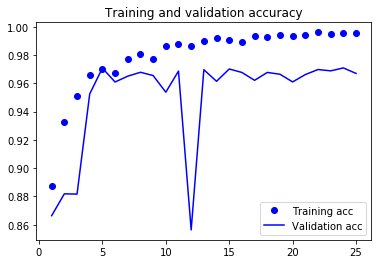

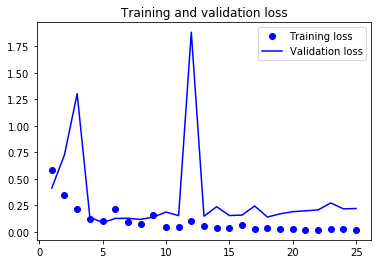

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [8]:
net_final.save_weights('My_InceptionResNetV2_BETA.h5')

In [ ]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:350]: 
    layer.trainable = False 
for layer in net_final.layers[350:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=25)#shuffle=True

Epoch 1/25
1250/1250 [==============================] - 1609s 1s/step - loss: 0.3827 - acc: 0.8871 - val_loss: 0.1145 - val_acc: 0.9800
Epoch 2/25
1250/1250 [==============================] - 1532s 1s/step - loss: 0.1017 - acc: 0.9732 - val_loss: 0.0533 - val_acc: 0.9820
Epoch 3/25
1250/1250 [==============================] - 1531s 1s/step - loss: 0.1018 - acc: 0.9818 - val_loss: 0.0854 - val_acc: 0.9802
Epoch 4/25
1250/1250 [==============================] - 1531s 1s/step - loss: 0.0628 - acc: 0.9867 - val_loss: 0.0519 - val_acc: 0.9836
Epoch 5/25
1250/1250 [==============================] - 1533s 1s/step - loss: 0.1537 - acc: 0.9828 - val_loss: 0.1008 - val_acc: 0.9806
Epoch 6/25
1250/1250 [==============================] - 1534s 1s/step - loss: 0.0386 - acc: 0.9916 - val_loss: 0.0875 - val_acc: 0.9796
Epoch 7/25
1250/1250 [==============================] - 1535s 1s/step - loss: 0.0292 - acc: 0.9938 - val_loss: 0.1138 - val_acc: 0.9792
Epoch 8/25
1250/1250 [==========================

In [9]:
net_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_8 (

In [6]:
net_final.save_weights('My_InceptionResNetV2_SIN_V1.h5')

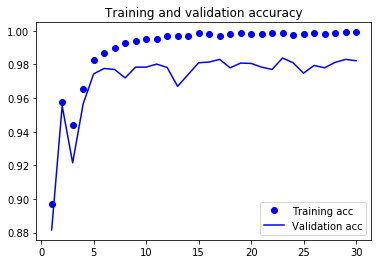

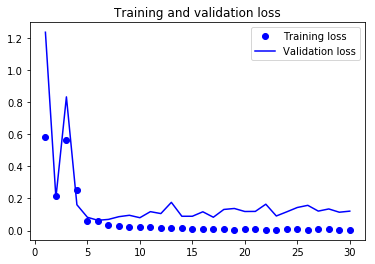

In [23]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

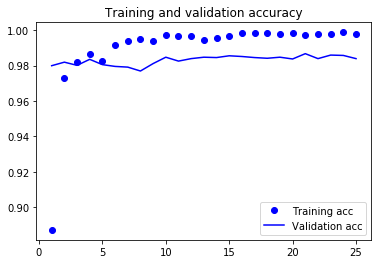

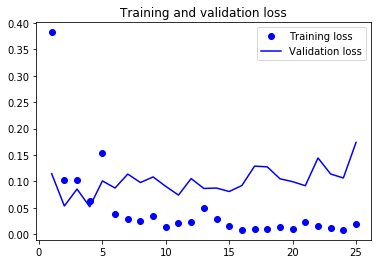

In [9]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:450]: 
    layer.trainable = False 
for layer in net_final.layers[450:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=5)#shuffle=True

Epoch 1/5
1250/1250 [==============================] - 1354s 1s/step - loss: 0.2057 - acc: 0.9455 - val_loss: 0.0846 - val_acc: 0.9804
Epoch 2/5
1250/1250 [==============================] - 1318s 1s/step - loss: 0.0742 - acc: 0.9786 - val_loss: 0.0386 - val_acc: 0.9864
Epoch 3/5
1250/1250 [==============================] - 1317s 1s/step - loss: 0.0471 - acc: 0.9871 - val_loss: 0.0784 - val_acc: 0.9840
Epoch 4/5
1250/1250 [==============================] - 1317s 1s/step - loss: 0.0350 - acc: 0.9908 - val_loss: 0.0360 - val_acc: 0.9882
Epoch 5/5
1250/1250 [==============================] - 1316s 1s/step - loss: 0.0329 - acc: 0.9924 - val_loss: 0.0284 - val_acc: 0.9916


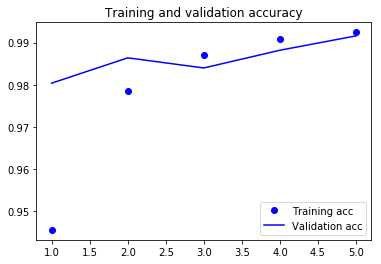

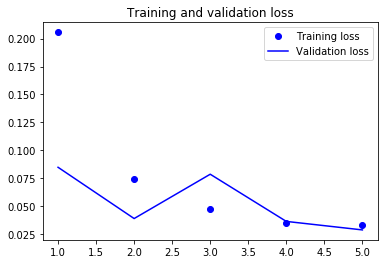

In [14]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:300]: 
    layer.trainable = False 
for layer in net_final.layers[300:]: 
    layer.trainable = True 

#my_optimizer=
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=25)

In [7]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dropout(0.5)(x) 
output_layer = Dense(2, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

#my_optimizer=
    
net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


net_final.load_weights('My_InceptionResNetV2_BETA.h5')

In [8]:
ls -ltr

total 10593496
-rw-rw-r-- 1 ubuntu ubuntu       18950 Aug  1 23:58 Untitled.ipynb
-rw-rw-r-- 1 ubuntu ubuntu           6 Aug  1 23:58 README.md
-rw-rw-r-- 1 ubuntu ubuntu       92952 Aug  1 23:58 model.h5_save
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  1 23:58 uda/
-rw-rw-r-- 1 ubuntu ubuntu      113903 Aug  1 23:58 sample_submission.csv
-rw-rw-r-- 1 ubuntu ubuntu      313693 Aug  1 23:58 pred.csv
-rw-rw-r-- 1 ubuntu ubuntu 10408222720 Aug  2 10:03 gap_InceptionResNetV2.h5
-rw-rw-r-- 1 ubuntu ubuntu   219796776 Aug  7 23:15 My_InceptionResNetV2_BETA.h5
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 train2/
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 train/
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 validation/
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  8 15:12 test2/
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  8 15:12 test/
-rw-rw-r-- 1 ubuntu ubuntu   219005688 Aug  9 16:42 My_InceptionResNetV2_BETA_V2.h5
-rw-rw-r-- 1 ubuntu ubuntu       79000 Aug 10 12:45 grad

In [9]:
cat sample_submission.csv

id,label
1,0.5
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,0.5
9,0.5
10,0.5
11,0.5
12,0.5
13,0.5
14,0.5
15,0.5
16,0.5
17,0.5
18,0.5
19,0.5
20,0.5
21,0.5
22,0.5
23,0.5
24,0.5
25,0.5
26,0.5
27,0.5
28,0.5
29,0.5
30,0.5
31,0.5
32,0.5
33,0.5
34,0.5
35,0.5
36,0.5
37,0.5
38,0.5
39,0.5
40,0.5
41,0.5
42,0.5
43,0.5
44,0.5
45,0.5
46,0.5
47,0.5
48,0.5
49,0.5
50,0.5
51,0.5
52,0.5
53,0.5
54,0.5
55,0.5
56,0.5
57,0.5
58,0.5
59,0.5
60,0.5
61,0.5
62,0.5
63,0.5
64,0.5
65,0.5
66,0.5
67,0.5
68,0.5
69,0.5
70,0.5
71,0.5
72,0.5
73,0.5
74,0.5
75,0.5
76,0.5
77,0.5
78,0.5
79,0.5
80,0.5
81,0.5
82,0.5
83,0.5
84,0.5
85,0.5
86,0.5
87,0.5
88,0.5
89,0.5
90,0.5
91,0.5
92,0.5
93,0.5
94,0.5
95,0.5
96,0.5
97,0.5
98,0.5
99,0.5
100,0.5
101,0.5
102,0.5
103,0.5
104,0.5
105,0.5
106,0.5
107,0.5
108,0.5
109,0.5
110,0.5
111,0.5
112,0.5
113,0.5
114,0.5
115,0.5
116,0.5
117,0.5
118,0.5
119,0.5
120,0.5
121,0.5
122,0.5
123,0.5
124,0.5
125,0.5
126,0.5
127,0.5
128,0.5
129,0.5
130,0.5
131,0.5
132,0.5
133,0.5
134,0.5
135,0.5
136,0.5
137,0.5
138

In [29]:
import pandas as pd

from keras.applications.inception_resnet_v2 import preprocess_input

df = pd.read_csv("sample_submission.csv")


image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'


test_gen = image_gen.flow_from_directory("test/", (299,299), shuffle=False, 
                                         batch_size=8, class_mode='binary')


result = net_final.predict_generator(generator=test_gen, verbose=1)

Found 12500 images belonging to 1 classes.
1563/1563 [==============================] - 420s 269ms/step


In [30]:
print(len(result))

print(result[12499])

12500
[1.00000e+00 1.16926e-17]


In [15]:
import glob

import re

file_list = sorted(glob.glob('test/test/*'),key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
i=1
a=list()
for file in file_list:
    i += 1
    print(i)
    img = image.load_img(file, target_size=(299, 299)) 
    # 图像预处理 
    x = image.img_to_array(img) 
    x = np.expand_dims(x, axis=0) 
    x = preprocess_input(x) 
    # 对图像进行分类 
    preds = net_final.predict(x)
    print(preds[0][0])
    a.append(preds[0])

print(a)


    
    
    

2
1.0
3
1.0
4
1.0
5
1.0
6
6.3348576e-05
7
4.9862196e-05
8
0.0
9
1.6080042e-13
10
9.536805e-13
11
1.1300056e-06
12
3.752819e-20
13
1.0
14
1.5282805e-18
15
1.1269729e-08
16
3.0697833e-11
17
0.00061144575
18
1.0
19
1.0
20
1.8760502e-09
21
9.5328315e-11
22
1.0
23
1.0348764e-09
24
1.0
25
0.9999976
26
1.068726e-15
27
1.0
28
1.0
29
1.6610292e-25
30
0.008917715
31
1.0
32
1.0
33
0.010854748
34
0.99981576
35
2.5675519e-08
36
1.4321452e-10
37
3.5159376e-06
38
9.78465e-12
39
1.1477011e-36
40
0.70258486
41
6.130784e-14
42
1.0
43
1.0
44
1.0
45
1.0
46
1.3578885e-08
47
1.0
48
2.2462114e-17
49
1.0
50
1.0
51
2.317762e-09
52
7.297958e-30
53
8.543511e-30
54
1.0819218e-23
55
1.0752695e-10
56
1.01806533e-19
57
1.0
58
1.0
59
7.646919e-28
60
1.0
61
2.1301058e-16
62
1.3231531e-08
63
1.0
64
4.057572e-12
65
2.1277502e-09
66
1.0
67
1.0
68
1.0
69
6.2798695e-22
70
1.0
71
1.0
72
1.0
73
1.0
74
1.0
75
1.0
76
0.0009105453
77
1.0
78
1.0
79
1.0
80
1.0
81
2.580474e-08
82
0.34425887
83
3.3980606e-24
84
1.0
85
0.0046833493


1.2703283e-18
624
4.1240975e-15
625
2.757585e-10
626
2.2468929e-07
627
1.0
628
1.8566703e-06
629
3.0760472e-12
630
0.999907
631
1.0
632
1.0
633
1.0
634
1.0
635
8.480197e-22
636
0.04976172
637
0.99998105
638
1.0
639
3.3079712e-22
640
2.0384548e-16
641
4.2964347e-17
642
1.0
643
0.00018691206
644
1.0
645
1.0
646
1.4555814e-13
647
7.760639e-05
648
3.2760792e-07
649
1.10181564e-20
650
2.3488433e-09
651
1.0
652
1.0
653
1.0
654
1.4920042e-14
655
1.0
656
1.0
657
1.0
658
1.0
659
1.0
660
4.0225434e-15
661
1.4933031e-13
662
1.0
663
1.6641147e-10
664
3.1499327e-05
665
3.4268907e-26
666
2.5527264e-05
667
0.00022934396
668
1.0
669
0.9999908
670
1.0
671
1.0
672
3.8754854e-16
673
2.2538409e-06
674
1.3866227e-09
675
1.2052413e-15
676
0.012546178
677
1.0
678
2.1164362e-10
679
0.0376645
680
1.0
681
0.00015189899
682
1.0
683
0.0002123507
684
2.3617036e-10
685
1.0
686
1.0
687
0.99994755
688
1.0
689
1.0
690
2.0434758e-13
691
0.9649249
692
1.0
693
4.1777864e-14
694
0.9997501
695
1.0
696
1.0
697
4.1779916e-11

1.0
1229
8.348717e-16
1230
5.8140554e-12
1231
1.4703375e-27
1232
9.0272384e-05
1233
1.0
1234
1.6633926e-27
1235
6.1729834e-16
1236
1.0
1237
1.0
1238
1.0
1239
1.0
1240
6.1272154e-11
1241
1.0306235e-13
1242
1.0
1243
1.0
1244
9.277963e-15
1245
5.34763e-10
1246
1.0
1247
2.1756317e-11
1248
3.7420834e-27
1249
1.0
1250
6.8371265e-29
1251
1.0
1252
2.888318e-12
1253
4.5029023e-16
1254
1.0
1255
2.9696294e-28
1256
5.114291e-05
1257
6.26987e-09
1258
0.99999666
1259
7.21759e-10
1260
2.1581207e-22
1261
7.001814e-18
1262
1.0
1263
3.576545e-18
1264
0.013077062
1265
5.285744e-28
1266
2.3825691e-11
1267
2.6717e-09
1268
0.7296681
1269
1.2831552e-09
1270
0.9999825
1271
3.0490365e-31
1272
1.0
1273
1.0
1274
1.0
1275
6.564182e-06
1276
1.0
1277
1.0
1278
7.785187e-12
1279
3.6624238e-07
1280
1.0
1281
0.99999535
1282
1.03648524e-07
1283
0.00019170035
1284
1.0
1285
1.0
1286
4.5907574e-28
1287
1.0
1288
1.4017942e-08
1289
1.6905551e-07
1290
1.0
1291
1.0
1292
4.2565734e-13
1293
0.16972263
1294
1.1106377e-12
1295
1.0

1.0
1791
7.322397e-07
1792
1.0
1793
3.3584975e-09
1794
2.4692317e-06
1795
1.0
1796
1.2262892e-19
1797
5.5615114e-06
1798
1.0
1799
0.008176835
1800
1.1019254e-08
1801
1.0
1802
1.0
1803
0.0
1804
1.0
1805
7.5822707e-25
1806
3.7581174e-21
1807
0.04450567
1808
1.0
1809
0.003112479
1810
1.0
1811
0.025651393
1812
1.0
1813
4.2621145e-06
1814
1.0
1815
1.0
1816
5.4433563e-17
1817
1.0
1818
1.0
1819
1.445932e-10
1820
0.8966767
1821
4.6019764e-14
1822
1.0
1823
3.024485e-07
1824
9.352609e-14
1825
1.634971e-05
1826
1.0
1827
0.003495972
1828
0.0
1829
0.9999318
1830
1.0
1831
4.1433134e-33
1832
1.0
1833
1.0
1834
8.26351e-05
1835
1.4813193e-22
1836
0.0
1837
7.060248e-13
1838
1.0
1839
1.0
1840
9.931023e-12
1841
1.0
1842
1.0
1843
1.0
1844
9.411456e-08
1845
1.534411e-11
1846
1.0
1847
1.0
1848
2.042471e-16
1849
1.0
1850
1.0
1851
0.9999877
1852
1.0
1853
3.0170846e-28
1854
1.0
1855
4.6439283e-30
1856
0.99999833
1857
1.0
1858
9.4321995e-11
1859
5.2179307e-06
1860
1.0
1861
1.0
1862
5.512797e-17
1863
2.769745e-18

1.0
2370
2.2175377e-09
2371
9.212858e-15
2372
1.2630281e-09
2373
1.0
2374
1.0
2375
0.9999999
2376
5.214797e-16
2377
1.0
2378
1.6680451e-18
2379
1.0
2380
3.2542303e-20
2381
3.8475036e-13
2382
1.0
2383
3.1142262e-11
2384
1.0
2385
1.0
2386
1.0
2387
1.0
2388
4.5478312e-26
2389
0.9999981
2390
0.99999976
2391
2.3671757e-06
2392
1.0
2393
1.4312477e-05
2394
1.0
2395
2.1976596e-35
2396
2.6996305e-29
2397
0.0
2398
6.958538e-05
2399
0.9862233
2400
6.0865314e-05
2401
1.0
2402
2.1953418e-17
2403
1.0
2404
1.0
2405
1.0
2406
2.4388238e-11
2407
1.0
2408
6.4529715e-10
2409
2.0496707e-07
2410
1.0
2411
9.801385e-05
2412
1.555275e-26
2413
1.0
2414
4.698262e-28
2415
8.263702e-17
2416
7.983896e-08
2417
1.0
2418
5.1722107e-09
2419
5.3990655e-15
2420
2.0122415e-15
2421
0.9841971
2422
2.3825691e-11
2423
1.0
2424
0.0006679756
2425
0.0005006691
2426
2.3552057e-12
2427
6.2792965e-14
2428
1.1044402e-11
2429
0.99999833
2430
1.5025374e-06
2431
1.0
2432
1.0
2433
1.0
2434
1.0
2435
9.352609e-14
2436
2.5960937e-08
2437
0

1.0
2948
1.6768098e-08
2949
1.0
2950
1.0
2951
0.9999944
2952
0.99969614
2953
1.0
2954
6.841425e-16
2955
7.344897e-25
2956
2.3985076e-06
2957
1.0
2958
3.136215e-08
2959
1.0
2960
3.2900967e-05
2961
0.0035144598
2962
0.99999964
2963
2.436652e-15
2964
9.253051e-10
2965
1.0
2966
2.4772933e-13
2967
2.2838793e-09
2968
1.0694198e-14
2969
1.7172889e-26
2970
0.27314404
2971
2.2400357e-07
2972
1.0
2973
1.0
2974
1.121875e-08
2975
1.0
2976
1.0
2977
0.016997255
2978
3.3276748e-16
2979
3.3799e-06
2980
6.00975e-14
2981
5.8282425e-28
2982
1.0
2983
1.0
2984
2.6443862e-22
2985
1.0
2986
4.05517e-10
2987
1.4573856e-15
2988
3.2325645e-21
2989
1.0
2990
4.3572868e-11
2991
1.0
2992
5.594576e-12
2993
1.0
2994
1.2204113e-08
2995
2.8264553e-17
2996
1.2874805e-08
2997
1.0
2998
7.791746e-10
2999
1.0
3000
0.0
3001
1.0
3002
1.0
3003
0.99999976
3004
1.6351345e-13
3005
2.5399278e-09
3006
1.0556347e-07
3007
1.0
3008
1.0
3009
3.4282582e-29
3010
1.0
3011
1.3806704e-06
3012
1.0
3013
4.0143792e-08
3014
0.0015349407
3015
1.3

1.0
3524
1.0
3525
0.9999981
3526
1.9295074e-07
3527
0.9996214
3528
1.0
3529
0.99850166
3530
1.0
3531
0.9950636
3532
0.0009851177
3533
0.99999785
3534
2.970546e-10
3535
0.022288717
3536
1.0
3537
1.0
3538
0.005038709
3539
1.0
3540
1.0
3541
6.006358e-14
3542
5.122878e-07
3543
1.0
3544
1.5315557e-06
3545
1.0
3546
2.0847647e-10
3547
0.99999964
3548
4.276997e-22
3549
2.967834e-17
3550
3.385944e-27
3551
1.0
3552
1.8817724e-29
3553
1.0
3554
1.7435598e-08
3555
1.0
3556
3.059583e-11
3557
2.5214585e-18
3558
1.0
3559
0.9999981
3560
1.8070285e-05
3561
3.9722522e-08
3562
4.7383975e-10
3563
1.0
3564
1.0
3565
1.7130185e-05
3566
1.8759565e-10
3567
0.0026226905
3568
1.0
3569
1.0
3570
1.0
3571
1.0
3572
0.99999726
3573
1.0
3574
1.2833262e-05
3575
1.0
3576
1.3924487e-12
3577
4.8949183e-19
3578
1.5505353e-08
3579
3.7394228e-23
3580
0.049607787
3581
1.0
3582
0.057887197
3583
1.0
3584
4.211902e-18
3585
2.8590133e-14
3586
1.0
3587
2.767533e-29
3588
1.0
3589
1.0
3590
1.2706876e-17
3591
1.2482701e-17
3592
8.7462

1.0
4097
1.2992543e-09
4098
1.8016342e-14
4099
5.7914655e-16
4100
1.0
4101
5.2238904e-18
4102
2.0166452e-22
4103
1.0
4104
0.99999344
4105
1.0
4106
3.314065e-11
4107
1.0707724e-19
4108
1.0
4109
1.0
4110
2.0369257e-06
4111
1.0
4112
9.465816e-14
4113
1.1227474e-10
4114
0.9999999
4115
3.1912839e-15
4116
5.143489e-11
4117
1.0
4118
5.6843044e-07
4119
0.0027634953
4120
2.3124079e-11
4121
6.4083157e-13
4122
1.0
4123
1.0
4124
7.412794e-24
4125
0.0
4126
1.0
4127
1.0
4128
5.6368947e-20
4129
9.427416e-11
4130
0.91676754
4131
1.0
4132
1.0
4133
1.0
4134
2.301435e-14
4135
1.939554e-12
4136
1.0
4137
1.0
4138
1.2050835e-25
4139
0.9999752
4140
6.4755426e-19
4141
6.2515753e-09
4142
0.89325625
4143
1.0
4144
1.0
4145
1.0
4146
1.0
4147
2.5341677e-18
4148
3.4698058e-07
4149
3.7358956e-11
4150
3.9841295e-18
4151
3.355848e-08
4152
4.7934268e-15
4153
1.0
4154
3.999001e-13
4155
1.0435188e-08
4156
1.0
4157
8.226941e-15
4158
1.7836546e-05
4159
2.3353348e-09
4160
4.8714262e-20
4161
2.9532899e-08
4162
1.0
4163
6.027

5.856225e-16
4665
1.0
4666
1.0
4667
1.0
4668
1.0
4669
1.0
4670
0.99999106
4671
1.0048053e-10
4672
1.0
4673
8.139839e-24
4674
0.026492847
4675
1.0
4676
0.9999999
4677
1.0
4678
1.0
4679
5.3925353e-17
4680
1.0
4681
1.0
4682
0.0
4683
4.089975e-15
4684
6.62868e-10
4685
0.7916714
4686
1.0
4687
1.0995705e-25
4688
0.0074911495
4689
6.753284e-07
4690
0.76293075
4691
1.3356757e-28
4692
1.0
4693
2.848854e-23
4694
1.0
4695
3.4713128e-09
4696
2.1309916e-31
4697
1.2807272e-09
4698
9.397802e-13
4699
0.9999895
4700
1.0
4701
1.0
4702
1.1954665e-28
4703
1.0
4704
4.459692e-10
4705
1.6580354e-07
4706
6.638094e-05
4707
1.8837392e-15
4708
2.727034e-10
4709
1.0
4710
0.99989045
4711
1.0
4712
1.0
4713
4.8580737e-24
4714
1.0
4715
0.77931446
4716
1.0
4717
6.349317e-10
4718
1.0
4719
1.0
4720
2.3070157e-05
4721
1.0
4722
5.303172e-05
4723
1.587846e-17
4724
1.0
4725
1.0
4726
3.5781236e-13
4727
1.0
4728
0.14591724
4729
9.87394e-13
4730
1.0
4731
1.0
4732
1.0
4733
0.9999945
4734
1.0
4735
1.0
4736
0.058625203
4737
1.0
4

3.266817e-13
5247
4.627906e-15
5248
8.183042e-19
5249
3.0791716e-11
5250
4.3278407e-05
5251
7.216488e-14
5252
1.0
5253
1.5386538e-08
5254
0.9381369
5255
1.8282996e-14
5256
1.5790468e-15
5257
1.0
5258
5.633787e-09
5259
1.0
5260
5.2803863e-08
5261
8.716764e-09
5262
9.713816e-09
5263
4.437802e-09
5264
8.0707026e-32
5265
1.0
5266
2.2382141e-17
5267
1.0
5268
7.6548255e-21
5269
0.20386758
5270
1.5569752e-23
5271
5.8577223e-12
5272
1.0
5273
4.404893e-22
5274
0.9999999
5275
1.0
5276
1.3706552e-06
5277
1.0
5278
1.0
5279
1.0
5280
1.0
5281
2.800095e-08
5282
1.0
5283
1.749932e-06
5284
0.2925871
5285
2.1275068e-24
5286
6.4120595e-16
5287
2.735823e-10
5288
4.5922554e-13
5289
1.0
5290
0.99982893
5291
0.0006136584
5292
1.0
5293
1.0
5294
1.0
5295
8.0843855e-13
5296
0.0031545954
5297
2.8308406e-05
5298
2.5448263e-16
5299
7.041659e-07
5300
0.97233653
5301
2.5413468e-05
5302
0.9929115
5303
0.9999999
5304
9.8914834e-14
5305
1.0
5306
1.0
5307
1.0
5308
0.99999964
5309
1.0
5310
3.6185018e-38
5311
1.0
5312
1.2

0.9877093
5838
1.5926742e-18
5839
0.00019130195
5840
1.0
5841
3.3081984e-22
5842
3.345089e-29
5843
0.14497201
5844
1.0
5845
5.8118935e-08
5846
1.0
5847
5.9213585e-12
5848
2.5585617e-08
5849
0.9750293
5850
1.0
5851
0.00020188809
5852
6.6400845e-13
5853
1.0
5854
1.1902593e-23
5855
3.3891297e-08
5856
0.00025758587
5857
7.929382e-06
5858
0.00028645425
5859
1.0
5860
1.9991262e-24
5861
1.0
5862
0.0
5863
1.0
5864
8.950394e-06
5865
0.46297157
5866
1.2450522e-05
5867
2.4138763e-10
5868
1.0217717e-22
5869
4.48893e-21
5870
1.0
5871
0.0003722684
5872
0.048073385
5873
5.134265e-15
5874
1.0
5875
1.0
5876
3.5188434e-05
5877
0.0008178806
5878
1.0
5879
1.0
5880
4.7602585e-24
5881
1.0
5882
1.0
5883
0.9999999
5884
0.9788898
5885
1.0
5886
1.8211294e-07
5887
1.0
5888
3.3155249e-07
5889
3.1521874e-14
5890
0.0138816
5891
1.0
5892
1.7121558e-07
5893
1.0
5894
1.0
5895
7.295454e-15
5896
0.03521786
5897
8.903289e-22
5898
0.67113173
5899
1.0
5900
1.1480292e-14
5901
5.2391227e-16
5902
1.0
5903
5.1944217e-18
5904
2

1.0
6411
7.8530527e-10
6412
3.411779e-15
6413
2.9758257e-10
6414
1.2132011e-18
6415
1.3136788e-29
6416
0.17959996
6417
2.3900725e-13
6418
0.017672801
6419
1.3947154e-13
6420
0.0
6421
1.0
6422
1.0
6423
1.0
6424
2.500675e-31
6425
2.7578783e-11
6426
0.001313037
6427
1.0
6428
2.40754e-10
6429
1.0
6430
1.0
6431
6.296264e-11
6432
0.9879418
6433
1.0
6434
0.99999547
6435
0.0005694529
6436
1.0
6437
1.0
6438
1.0512504e-11
6439
0.99999976
6440
1.0
6441
7.593573e-07
6442
1.8878013e-25
6443
1.0537974e-06
6444
1.0
6445
1.0
6446
1.0
6447
1.0
6448
1.0
6449
0.98643154
6450
1.0
6451
1.0
6452
3.483827e-10
6453
1.1185781e-08
6454
1.0
6455
3.116736e-17
6456
1.0
6457
0.00451175
6458
0.9999999
6459
0.008432504
6460
5.823545e-07
6461
1.0
6462
1.0
6463
1.0
6464
1.8969453e-35
6465
1.0
6466
0.00010212159
6467
1.0
6468
1.0
6469
1.0
6470
1.0
6471
5.0536015e-09
6472
1.1981015e-05
6473
5.805933e-08
6474
1.0
6475
4.1945252e-16
6476
1.0
6477
1.0
6478
1.18350244e-26
6479
1.0
6480
2.901713e-20
6481
1.0
6482
0.99999905
6

1.0
6987
1.0
6988
0.99964
6989
4.677764e-05
6990
4.3322142e-17
6991
5.920259e-25
6992
1.9545169e-15
6993
1.0
6994
3.7837945e-05
6995
1.0
6996
1.3549187e-15
6997
0.9999844
6998
1.0
6999
4.080496e-17
7000
1.0
7001
1.0
7002
1.0
7003
1.0
7004
1.1119074e-05
7005
0.00023111874
7006
4.8219106e-10
7007
1.0
7008
2.3048187e-07
7009
1.0
7010
3.239432e-11
7011
1.0
7012
7.862888e-09
7013
2.4096226e-24
7014
1.0
7015
2.3076852e-06
7016
1.1298091e-35
7017
0.00019482298
7018
1.0
7019
1.0
7020
6.505625e-19
7021
0.00019362444
7022
1.4814569e-12
7023
2.651621e-13
7024
7.851745e-11
7025
4.5580856e-23
7026
2.2482567e-09
7027
1.0
7028
2.4132142e-13
7029
0.0
7030
4.5479766e-08
7031
8.881228e-17
7032
1.0
7033
4.818392e-13
7034
2.9143517e-14
7035
0.99808794
7036
1.0
7037
1.0
7038
1.0
7039
2.1363132e-10
7040
0.10035614
7041
0.08896204
7042
1.4962595e-17
7043
5.649932e-06
7044
1.0
7045
3.3657632e-06
7046
1.2849619e-14
7047
1.020976e-16
7048
1.0
7049
7.876227e-18
7050
3.2611192e-10
7051
1.0827159e-13
7052
1.0
7053

1.0
7562
1.4574733e-09
7563
1.0
7564
1.0
7565
1.0
7566
3.637105e-21
7567
5.0558215e-38
7568
1.0
7569
0.0
7570
1.0
7571
0.00013593365
7572
0.2653472
7573
1.0
7574
4.042109e-30
7575
1.0
7576
1.2894908e-08
7577
3.2660873e-07
7578
0.9738974
7579
0.3316813
7580
1.0
7581
1.0
7582
0.00045227126
7583
0.9930655
7584
8.3532364e-17
7585
1.0
7586
1.0
7587
1.2056001e-15
7588
0.75699115
7589
5.525333e-07
7590
1.0
7591
1.0
7592
1.0
7593
0.014586088
7594
0.0001536078
7595
1.0
7596
1.0
7597
1.0
7598
6.135065e-14
7599
2.4359996e-09
7600
0.9999914
7601
1.0
7602
1.0
7603
3.9161877e-10
7604
1.0
7605
4.892678e-19
7606
4.293046e-16
7607
1.0
7608
0.03118518
7609
1.0
7610
0.9999999
7611
1.5288177e-17
7612
5.6576577e-10
7613
0.9999895
7614
1.0
7615
2.2286681e-09
7616
1.0
7617
1.0
7618
6.997202e-07
7619
9.557788e-12
7620
1.3356252e-20
7621
2.4906446e-09
7622
3.2494537e-13
7623
1.0
7624
1.0
7625
4.0455205e-14
7626
1.0
7627
2.8333532e-06
7628
1.0
7629
1.0
7630
3.4535258e-10
7631
6.645265e-06
7632
1.0
7633
1.005191

1.0
8144
1.0
8145
1.903448e-08
8146
1.0
8147
1.8764736e-08
8148
0.99999475
8149
1.0
8150
2.9121322e-06
8151
3.526034e-07
8152
5.5463797e-24
8153
1.7885156e-31
8154
1.0
8155
1.1820218e-12
8156
1.0
8157
0.00040680455
8158
1.0
8159
1.0
8160
1.0
8161
1.0
8162
1.06891836e-10
8163
1.0
8164
2.086766e-21
8165
0.99996805
8166
4.1656276e-06
8167
0.9995301
8168
1.7905508e-15
8169
0.1422788
8170
1.0
8171
6.2153963e-06
8172
3.013335e-13
8173
7.543409e-07
8174
0.0001387348
8175
1.0
8176
0.0005502145
8177
4.429028e-06
8178
1.0
8179
2.2873821e-11
8180
3.61881e-13
8181
1.0
8182
4.7418778e-14
8183
0.9999945
8184
1.0
8185
8.205062e-08
8186
1.0
8187
1.373019e-07
8188
1.0
8189
1.0637927e-14
8190
2.5576754e-14
8191
0.99940467
8192
0.9999999
8193
4.7830545e-10
8194
1.0
8195
1.0
8196
0.029139793
8197
2.5622178e-06
8198
1.0
8199
7.404061e-13
8200
1.0
8201
2.4273656e-15
8202
0.9999999
8203
1.0
8204
0.018109951
8205
9.000788e-21
8206
1.0
8207
0.891403
8208
1.0
8209
1.0
8210
3.0575213e-20
8211
1.4300058e-07
8212


1.0
8714
1.0
8715
2.479621e-19
8716
1.0
8717
2.5436622e-05
8718
0.0
8719
6.849381e-11
8720
1.0
8721
0.99999964
8722
1.0
8723
1.0
8724
0.0
8725
0.00045483286
8726
0.9999598
8727
5.6432264e-25
8728
1.0
8729
1.0
8730
1.0
8731
0.028564302
8732
0.9964128
8733
1.0
8734
1.0
8735
1.157455e-06
8736
0.8150729
8737
1.0
8738
6.815768e-06
8739
0.9963839
8740
0.9990514
8741
1.0
8742
4.2997507e-30
8743
1.5455365e-08
8744
0.008252524
8745
9.6118394e-17
8746
1.0
8747
1.0
8748
8.657119e-12
8749
6.304853e-07
8750
1.1239894e-11
8751
5.08236e-20
8752
1.682923e-12
8753
0.105247736
8754
4.0199356e-30
8755
2.1185873e-19
8756
0.9548755
8757
1.0
8758
1.0313893e-30
8759
1.0
8760
1.0
8761
1.9339105e-26
8762
0.95308983
8763
1.0
8764
0.13595621
8765
1.1903122e-18
8766
8.846153e-05
8767
3.2916903e-10
8768
1.0
8769
1.0
8770
6.0108323e-05
8771
6.991844e-22
8772
1.0
8773
0.95844525
8774
1.6866289e-06
8775
1.1587954e-22
8776
1.0
8777
0.0
8778
2.9003497e-29
8779
0.00073993666
8780
1.0
8781
9.801085e-16
8782
1.7044202e-17

0.0012733156
9303
1.0
9304
0.0001888007
9305
1.0
9306
4.184231e-07
9307
1.0926434e-08
9308
7.7961836e-08
9309
0.19364616
9310
1.0138747e-10
9311
1.0
9312
0.9969422
9313
1.0
9314
7.1122996e-09
9315
4.0508185e-05
9316
1.0
9317
1.0
9318
3.207486e-11
9319
1.3221028e-13
9320
1.0
9321
2.368131e-05
9322
1.0
9323
0.99863595
9324
1.0
9325
2.0925996e-15
9326
2.1175815e-15
9327
1.0
9328
5.1164715e-08
9329
1.4491976e-05
9330
0.1117215
9331
0.99752086
9332
1.0
9333
1.5020751e-25
9334
1.0
9335
1.0
9336
1.0
9337
1.0
9338
2.629958e-24
9339
0.000112082984
9340
1.1197717e-15
9341
1.8049947e-14
9342
1.0
9343
1.0
9344
1.0
9345
1.0
9346
1.0
9347
1.0
9348
1.0
9349
1.0511095e-12
9350
3.721764e-22
9351
1.0
9352
3.869115e-18
9353
3.316694e-12
9354
3.9578578e-13
9355
0.9999958
9356
1.0700214e-26
9357
1.0
9358
1.0
9359
1.0
9360
7.9335905e-23
9361
1.0
9362
1.0
9363
1.0
9364
1.074553e-06
9365
1.0
9366
1.0
9367
1.0
9368
0.9999999
9369
7.152556e-12
9370
1.0
9371
1.2224766e-36
9372
6.264935e-08
9373
1.0
9374
0.000761

1.0
9873
1.0752717e-10
9874
1.0
9875
1.4995882e-13
9876
2.8856815e-05
9877
0.0
9878
9.230042e-06
9879
7.360772e-14
9880
1.6959274e-06
9881
1.0
9882
0.00025139068
9883
1.0
9884
2.023262e-05
9885
3.341847e-38
9886
1.0
9887
1.0
9888
1.0
9889
5.1806094e-18
9890
1.0
9891
0.9999993
9892
0.9989384
9893
3.388999e-24
9894
1.4965945e-08
9895
1.3921647e-08
9896
1.0
9897
1.0
9898
8.564969e-11
9899
1.4390983e-24
9900
9.507032e-33
9901
8.9043796e-21
9902
2.1771298e-15
9903
1.3048059e-11
9904
1.0
9905
3.9832646e-10
9906
3.3795553e-20
9907
5.3042263e-06
9908
1.9500637e-11
9909
0.00027785395
9910
8.0864935e-05
9911
1.0
9912
0.99999964
9913
1.0
9914
6.535006e-05
9915
0.9999379
9916
1.7173725e-09
9917
1.0
9918
0.9999919
9919
0.9999993
9920
1.0
9921
0.9999999
9922
1.0
9923
0.0135142105
9924
6.058363e-33
9925
7.0377075e-15
9926
1.0
9927
1.0
9928
1.519296e-23
9929
7.1594836e-10
9930
2.5307036e-15
9931
4.2962418e-07
9932
0.99999976
9933
1.0
9934
1.0
9935
1.0
9936
1.0
9937
1.598873e-08
9938
1.0
9939
0.9999913

2.7936377e-07
10414
1.7036202e-10
10415
0.99999976
10416
1.0
10417
2.5621833e-07
10418
1.3193747e-09
10419
6.3061706e-10
10420
1.0
10421
0.9999999
10422
0.999997
10423
0.31919155
10424
0.0
10425
7.980333e-12
10426
1.0
10427
1.9007199e-06
10428
1.0
10429
0.977431
10430
1.0
10431
3.2488692e-06
10432
1.5085634e-26
10433
1.0
10434
1.0
10435
1.0
10436
4.2870904e-15
10437
1.0
10438
1.5338506e-09
10439
1.0
10440
1.191886e-05
10441
1.9459595e-32
10442
7.2466944e-05
10443
0.9999999
10444
1.0
10445
1.0
10446
1.0
10447
1.0
10448
1.0
10449
1.0
10450
1.0
10451
7.1099765e-10
10452
5.030095e-18
10453
0.1100193
10454
1.0
10455
1.2778919e-09
10456
9.773565e-09
10457
0.999561
10458
2.5248987e-30
10459
1.0
10460
1.996473e-10
10461
8.849001e-13
10462
2.0832257e-37
10463
1.0
10464
0.0011572973
10465
1.0
10466
1.0
10467
1.0
10468
5.188178e-09
10469
9.715985e-24
10470
2.6041855e-07
10471
1.4229147e-14
10472
7.409109e-19
10473
4.0211275e-17
10474
1.0
10475
0.9999999
10476
5.9236103e-22
10477
1.0
10478
4.35755

2.6903732e-14
10949
0.9999865
10950
1.2149362e-21
10951
1.3218192e-26
10952
1.0
10953
0.9999975
10954
1.9733278e-16
10955
1.0
10956
2.4069962e-23
10957
0.0015272094
10958
1.0
10959
4.696698e-15
10960
0.99999964
10961
2.3748456e-16
10962
1.0
10963
0.9998727
10964
1.0
10965
2.4167013e-09
10966
2.2333585e-12
10967
1.0
10968
1.8494428e-07
10969
1.0
10970
1.5971371e-10
10971
3.1181072e-15
10972
4.0648905e-13
10973
1.0345235e-08
10974
1.0
10975
1.0
10976
9.945925e-19
10977
1.0
10978
6.32448e-10
10979
0.5283019
10980
1.0
10981
1.6273381e-16
10982
1.0
10983
1.0
10984
1.0
10985
1.0
10986
1.0
10987
1.0536219e-17
10988
3.5727315e-23
10989
4.90687e-13
10990
5.1264763e-11
10991
1.0
10992
5.281718e-11
10993
1.567962e-28
10994
1.0
10995
0.9999982
10996
7.158906e-11
10997
1.0
10998
3.8041123e-37
10999
1.0
11000
2.4705454e-07
11001
0.00012033655
11002
1.0
11003
1.0
11004
0.0002470453
11005
1.0448957e-18
11006
1.0
11007
1.0
11008
0.99999833
11009
2.761483e-08
11010
0.0042212647
11011
1.0
11012
0.8556102

2.3539988e-11
11495
1.0
11496
1.2962167e-21
11497
1.0
11498
1.0
11499
1.8753199e-06
11500
3.5000292e-07
11501
1.0699003e-06
11502
1.6400664e-07
11503
0.99911016
11504
1.0
11505
2.38851e-16
11506
6.243388e-13
11507
1.0
11508
0.99799097
11509
3.5893483e-20
11510
1.056044e-06
11511
1.0
11512
3.3399843e-13
11513
0.9998186
11514
1.0
11515
0.9999769
11516
1.0
11517
0.99999475
11518
1.4782352e-05
11519
5.7399765e-16
11520
0.9999999
11521
1.0
11522
1.0
11523
0.99999976
11524
9.835428e-09
11525
2.238886e-08
11526
6.6605496e-15
11527
1.0
11528
1.0
11529
5.833495e-06
11530
1.871434e-08
11531
1.0
11532
4.0871705e-21
11533
0.0012854554
11534
1.0
11535
8.86102e-07
11536
1.0
11537
1.0
11538
0.98759204
11539
2.3873415e-06
11540
1.0
11541
8.249551e-34
11542
1.0
11543
1.0
11544
1.1185174e-21
11545
1.2260952e-15
11546
1.2513948e-22
11547
8.5685326e-07
11548
1.2021833e-15
11549
1.0
11550
7.6590805e-16
11551
1.0
11552
6.0044566e-14
11553
1.0
11554
0.9996667
11555
1.0
11556
0.9999987
11557
1.0093432e-12
115

0.0035071045
12032
4.991651e-12
12033
7.280551e-15
12034
1.0
12035
5.0303793e-08
12036
0.99890494
12037
5.3481785e-11
12038
1.0
12039
1.0
12040
1.0
12041
1.0
12042
0.99993515
12043
6.318493e-07
12044
0.019333694
12045
1.04546696e-16
12046
0.00043706145
12047
0.9998714
12048
6.007268e-20
12049
1.0
12050
1.4382915e-09
12051
1.2791486e-19
12052
1.0
12053
1.0
12054
0.05162437
12055
0.99950886
12056
1.0
12057
0.9992378
12058
1.0
12059
0.09358323
12060
2.2149407e-14
12061
0.9999995
12062
1.0
12063
1.0
12064
0.00026194495
12065
1.0
12066
8.402977e-37
12067
1.0197142e-10
12068
0.0001038154
12069
1.5949834e-05
12070
0.0
12071
1.7938172e-13
12072
1.2830973e-08
12073
3.5373637e-23
12074
1.0
12075
1.0
12076
1.0
12077
1.0
12078
1.3954824e-12
12079
4.980069e-07
12080
1.0
12081
0.99999905
12082
5.397612e-08
12083
1.0
12084
1.5715528e-08
12085
3.7068803e-05
12086
9.351341e-07
12087
1.0
12088
1.0
12089
0.9013619
12090
8.849755e-06
12091
1.0
12092
2.2485179e-07
12093
1.0
12094
1.8273316e-13
12095
1.0
12

In [16]:

    
def to_f(x):
    y='{:.18f}'.format(x) # 5f表示保留5位小数点的float型
    return(y)


for i in a:
    print(to_f(i[0]))

1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000063348576077260
0.000049862195737660
0.000000000000000000
0.000000000000160800
0.000000000000953680
0.000001130005557570
0.000000000000000000
1.000000000000000000
0.000000000000000002
0.000000011269729150
0.000000000030697833
0.000611445750109851
1.000000000000000000
1.000000000000000000
0.000000001876050204
0.000000000095328315
1.000000000000000000
0.000000001034876407
1.000000000000000000
0.999997615814208984
0.000000000000001069
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.008917715400457382
1.000000000000000000
1.000000000000000000
0.010854748077690601
0.999815762042999268
0.000000025675518600
0.000000000143214524
0.000003515937578413
0.000000000009784650
0.000000000000000000
0.702584862709045410
0.000000000000061308
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000013578884683
1.000000000000000000
0.000000000000000022
1.00000000000

0.000000000013448005
1.000000000000000000
0.000000000000561103
0.000000000000000000
0.999999880790710449
1.000000000000000000
1.000000000000000000
0.975683987140655518
0.999472558498382568
0.000000000011811547
0.006115369498729706
1.000000000000000000
0.000000156016554342
0.000000006626344362
1.000000000000000000
0.000000000000258364
0.000016231189874816
0.999162077903747559
0.000000000000000930
1.000000000000000000
0.109480030834674835
0.000004064732820552
1.000000000000000000
0.000000001179616071
1.000000000000000000
0.056255646049976349
1.000000000000000000
1.000000000000000000
0.000314844422973692
0.000000622765696789
0.000000653893209801
0.000001004747900879
0.000000000000000000
0.000000000000013522
1.000000000000000000
0.000000000061200912
0.999999642372131348
0.000000025587519659
0.000000000000003335
0.000000000000000000
0.945284426212310791
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000003682
1.000000000000000000
1.000000000000000000
1.00000000000

0.000000000000000000
0.000000000000000000
0.000000000006107726
0.000000000036879506
0.000001233249349752
1.000000000000000000
0.000000241842798232
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000006669481856
1.000000000000000000
0.000000000172528075
0.000000000000000000
0.000000000233122577
0.000000000000862105
1.000000000000000000
0.999999880790710449
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000622774610
0.000000000001147490
1.000000000000000000
1.000000000000000000
0.000416593189584091
1.000000000000000000
0.999841332435607910
0.000000000000000895
0.000000000000064091
0.000000000000000000
0.000817691267002374
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000584759
0.999217271804809570
1.000000000000000000
1.000000000000000000
0.003302216762676835
0.000092060756287538
1.000000000000000000
0.000000000006898516
0.000000124047019767
0.00000000000

0.000000000000000000
0.017042849212884903
0.019331570714712143
1.000000000000000000
0.989163637161254883
0.000935588614083827
1.000000000000000000
1.000000000000000000
0.000000019034480658
1.000000000000000000
0.000000018764735543
0.999994754791259766
1.000000000000000000
0.000002912132231359
0.000000352603393594
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000001182022
1.000000000000000000
0.000406804552767426
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000106891836
1.000000000000000000
0.000000000000000000
0.999968051910400391
0.000004165627615293
0.999530076980590820
0.000000000000001791
0.142278805375099182
1.000000000000000000
0.000006215396297193
0.000000000000301334
0.000000754340874209
0.000138734802021645
1.000000000000000000
0.000550214492250234
0.000004429028194863
1.000000000000000000
0.000000000022873821
0.000000000000361881
1.000000000000000000
0.000000000000047419
0.999994516372680664
1.00000000000

0.000000409263520851
0.000005349801085686
0.000000000000002495
1.000000000000000000
0.999823987483978271
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000019630384429
1.000000000000000000
0.999999880790710449
0.997865736484527588
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000008813077329251
1.000000000000000000
0.000000000080595447
1.000000000000000000
0.000000000000019548
0.977438867092132568
0.000000000000245786
0.000000502484624576
1.000000000000000000
1.000000000000000000
0.002182123484089971
0.000007028976597212
0.000149647079524584
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000683414100422
0.999767601490020752
1.000000000000000000
1.000000000000000000
0.999907970428466797
0.011395920999348164
1.000000000000000000
0.000000000000000000
0.999991297721862793
0.992568910121917725
1.00000000000

In [21]:
with open('test_result_v3.csv','w') as f:
    f.write('id,label\n')


with open('test_result_v3.csv','a') as f:
    count = 1
    for i in a:
        predict = to_f(i[0])
        f.write('{},{}\n'.format(count,predict))
        count += 1

In [22]:
img = image.load_img('test/test/9240.jpg')
img.show()

In [20]:
cat test_result.csv


id,label
1,0.000000000000000000
2,0.000000000347637946
3,0.000000000000000000
4,0.000000000000000000
5,0.000000000000000000
6,0.000000000000000000
7,0.000000000000000000
8,1.000000000000000000
9,0.970538854598999023
10,0.000000000000000000
11,1.000000000000000000
12,0.000000000000002857
13,0.000000000002145454
14,1.000000000000000000
15,0.984719514846801758
16,1.000000000000000000
17,0.000000000000000000
18,1.000000000000000000
19,0.000000000000000000
20,1.000000000000000000
21,1.000000000000000000
22,1.000000000000000000
23,0.000000000000000000
24,0.000000000000000000
25,0.000000000000000000
26,1.000000000000000000
27,1.000000000000000000
28,0.000000012462205490
29,1.000000000000000000
30,1.000000000000000000
31,1.000000000000000000
32,0.998192012310028076
33,1.000000000000000000
34,1.000000000000000000
35,0.000000000000000000
36,0.000000000000000000
37,0.000000000000000000
38,0.000000001836083396
39,0.000000000000000000
40,1.000000000000000000
41,1.000000000000000000
42,1.00000000000

In [53]:
result = []
for i in a:
    (a1,a2) = (i[0][0],i[0][1])
    if abs(a1-5) > abs(a2-5):
        result.append(a1)
    else:
        result.append(a2)

print(result)
    

[1.6857295e-21, 6.3089287e-06, 3.3913997e-19, 0.0, 2.4487924e-31, 0.0, 0.0, 0.0, 1.078821e-07, 1.12347e-20, 1.3260026e-16, 0.00036151282, 7.140636e-10, 0.0, 0.30113432, 2.14834e-35, 0.0, 0.0, 2.2546779e-38, 0.0, 8.615187e-22, 1.2822288e-23, 1.6721041e-32, 0.0, 3.1148067e-27, 5.3265442e-15, 3.5827072e-31, 3.46173e-10, 2.9845747e-13, 1.9436937e-35, 1.8094154e-27, 4.335484e-11, 0.0, 1.7674008e-14, 0.0, 1.06402536e-19, 0.0, 0.0013746087, 0.0, 2.255221e-37, 6.34068e-35, 1.292154e-13, 1.9985398e-06, 0.0, 7.740079e-18, 1.355724e-17, 0.0026566563, 2.689564e-09, 9.970703e-17, 1.8641435e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.919614e-07, 0.0, 3.6766894e-09, 0.0, 1.2448146e-07, 1.8232415e-16, 1.2596774e-08, 3.0696187e-19, 1.4837693e-28, 9.029793e-18, 1.969908e-05, 1.0425532e-28, 0.06475502, 1.7226923e-05, 0.0, 1.186955e-10, 0.0, 9.0477896e-26, 0.0, 1.6844625e-22, 3.0259457e-22, 0.0, 0.0013987796, 1.3202385e-31, 3.3777287e-33, 0.0, 7.1054926e-09, 0.0, 0.0, 1.6280224e-22, 0.0, 2.4222818e-12, 0.0522883

In [32]:
from keras.applications.inception_resnet_v2 import preprocess_input

img_width, img_height = 299,299



#seems rescale is very important.
#image_gen = ImageDataGenerator(featurewise_center=False,fill_mode='nearest',
#                               cval=0,horizontal_flip=True,rotation_range=20,shear_range=0.2,rescale=1./255)



image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'

train_gen = image_gen.flow_from_directory("train3", (img_width,img_height), shuffle=False,
                                    batch_size=16,class_mode='binary')# subset = "training",class_mode="categorical" ,interpolation='bicubic',




Found 24992 images belonging to 2 classes.


In [ ]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=30,shuffle=True)

In [ ]:
print("test")

In [22]:
ls -ltr test_result*

-rw-rw-r-- 1 ubuntu ubuntu      9 Aug 12 11:48 test_result.csv
-rw-rw-r-- 1 ubuntu ubuntu 326403 Aug 12 11:48 test_result_v3.csv


In [20]:
rm test_result_v3*

In [23]:
cat test_result_v3.csv |wc -l

12501
